# E-commerce — Выявление профилей потребления

## Материалы
Презентация: https://yadi.sk/i/mMmd8VPg3f2I9g

## Оглавление
* [ЦЕЛЬ: сегментирование покупателей по профилю потребления](#step1)

* [План исследования](#step2)

* [Описание данных](#step3)

* [Исследование](#step4)
    * [Шаг 1. Изучение общей информации](#step5)
    * [Шаг 1. Вывод](#step6)
    * [Шаг 2. Исследовательский анализ](#step7)
    * [Шаг 2. Вывод](#step8)
    * [Шаг 3. Сегментация покупателей по профилю потребления](#step9)
    * [Шаг 3. Вывод](#step10)
    * [Шаг 4. Проверка статистических гипотез](#step11)
    * [Шаг 4. Вывод](#step12)
               
* [Общие выводы](#step13)


## ЦЕЛЬ: Сегментирование покупателей по профилю потребления  <a id="step1"></a> 

Цель исследования - сегментировать покупателей по профилю потребления, чтобы в дальнейшем построить рекомендательную систему на основе их предыдущей покупательской активности:

* сформировать типичные портреты пользователей: выделить несколько наиболее характерных потребительских корзин;
* проанализировать основные свойства пользователей (средний доход от одного пользователя, как часто совершают покупки, есть ли сезонность и т.д.);
* сформулировать и проверить основные гипотезы:
 
                      - выручка магазина от пользователей из разных сегментов одинакова;
                      - среднии выручки от одного пользователя из каждого сегмента одинаковы.


## План исследования:  <a id="step2"></a> 

**1. Шаг - Изучение общей информации:** 

Обзор данных, первичное исследование.

**2. Шаг - исследовательский анализ данных:** 

Для достоверности и удобства дальнейшего анализа необходимо:

1. Привести данные к нужным типам, найти и заполнить пропуски при необходимости;
1. Построить диаграмму, отображающую сумму покупок по дням;
1. Построить гистограмму, отображающую распределение заказов по сумме.

**3. Шаг - сегментация покупателей по профилю потребления:**  

1. Построить модель классификации покупателей (примерная разбивка: дачники, цветоводы и т.д.);
1. Разбить данные по классам покупателей;


**4. Шаг - проверка статистических гипотез:**  

Необходимо сформулировать и проверить следующие гипотезы:

                      - выручка магазина от пользователей из разных сегментов одинакова;
                      - среднии выручки от одного пользователя из каждого сегмента одинаковы.

**5. Шаг - общие выводы:** 

По результатам исследования необходимо сделать основные выводы.

## Описание данных:  <a id="step3"></a> 

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

Колонки в  *ecommerce_dataset.csv* :

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Исследование <a id="step4"></a> 


## Шаг 1. Изучение общей информации  <a id="step5"></a> 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import datetime as dt
import math as mth
from scipy import stats as st
from scipy.stats import mannwhitneyu
import plotly.express as px
from plotly import graph_objects as go
from IPython.display import display
pd.set_option('display.max_columns', None) 
pd.options.display.max_colwidth = 110
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pymystem3 import Mystem
from collections import Counter
import functools, operator

In [2]:
df = pd.read_csv('/datasets/ecommerce_dataset.csv')

Перед тем, как перейти к самому анализу, проделаем предобработку: выведем данные, проверим типы данных, наличие дубликатов и пропусков:

In [3]:
#df = pd.read_csv('/Users/mariia/Documents/python/выпускной проект/ecommerce_dataset.csv')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Первый столбец с датой выглядит непривычно. Посмотрим на все типы данных в таблице:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


В датафрейме нет пропущенных данных, но нужно переделать тип данных для столбца date из целочисленного в формат даты и времени. В начале указан год, затем скорее всего месяц и день. Пока не ясно, что означают две последние цифры. Посмотрим на диапазон значений даты:

In [5]:
print(df.date.max())
print(df.date.min())

2019103116
2018100100


В нашем распоряжении данные с 01.10.2018 по 31.10.2019, т.е. за триннадцать месяцев. 

Можно предположить, что последние две цифры означают час. Посмотрим для уточнения, какие значения принимают две последние цифры в столбце даты:

In [6]:
(df.date % 100).value_counts()

13    569
9     517
10    487
11    475
14    457
16    455
8     416
17    396
12    394
15    378
22    376
19    374
20    305
21    287
18    276
7     162
23    115
0      82
6      73
1      44
5      40
4      28
2      21
3      10
Name: date, dtype: int64

Действительно, последние две цифры в столбце даты - это значение часа, в который совершена покупка. Более того, выше мы получили распределение покупок по времени дня. Можно сделать вывод о том, что покупатели наиболее активны в дневное время, а пик активности приходится на час дня. Преобразуем данные в столбце в форматы даты и времени:

In [7]:
df['date'] = pd.to_datetime(df['date'],format='%Y%m%d%H')
df.head()

,date,customer_id,order_id,product,quantity,price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Проверим, что данные о часе не потерялись:

In [8]:
pd.DatetimeIndex(df['date']).hour

Int64Index([ 0,  0,  0,  0,  0,  0,  0,  8,  8,  9,
            ...
            21,  0,  2,  9, 11, 11, 12, 13, 14, 16],
           dtype='int64', name='date', length=6737)

Проверим данные на наличие дубликатов:

In [9]:
df.duplicated().sum()

0

Дубликатов нет. Мы уже знаем, что в датасете 6737 строк. Посмотрим, сколько у нас уникальных товаров, заказов и юзеров:

In [10]:
print(f"Всего в датасете фигурирует {df['product'].nunique()} уникальных товара."
      f" В датасете {df.customer_id.nunique()} уникальный пользователь."
      f" Они совершили суммарно {df.order_id.nunique()} заказа."
      f" Таким образом на каждого пользователя приходится в среднем "
      f"{round(df.order_id.nunique()/df.customer_id.nunique(),2)} заказов.")


Всего в датасете фигурирует 2343 уникальных товара. В датасете 2451 уникальный пользователь. Они совершили суммарно 2784 заказа. Таким образом на каждого пользователя приходится в среднем 1.14 заказов.


## Шаг 1. Выводы  <a id="step6"></a> 

На первом этапе был изучен датафрейм с информацией о дате заказа, id заказа и пользователя, совершившего этот заказ, а также названием, количеством и стоимостью продукта. Пропущенных значений и дубликатов нет, столбец с данными о дате и времени заказа переведён в соответствующий тип. В ходе изучения данных было установлено следующее:

1. в нашем распоряжении данные с 01.10.2018 по 31.10.2019, таким образом мы можем проверить гипотезу о том, что некоторые товары обладают свойством сезонности;
1. покупатели наиболее активны в дневное время, а пик активности приходится на час дня;
1. в датасете фигурирует 2343 уникальных товара;
1. численность уникальных пользователей составляет 2451 человек;
1. суммарно совершено 2784 заказа, т.е. примерно по 1.14 заказа на уникального пользователя.

## Шаг 2. Исследовательский анализ  <a id="step7"></a> 

Исследуем наш датасет на различного рода выбросы. Посмотрим для начала, в каком диапазоне лежит стоимость товара и число проданных единиц:

In [11]:
df.describe()

,order_id,quantity,price
count,6737.000000,6737.000000,6737.000000
mean,43128.948345,2.501559,462.028499
std,27899.414662,15.266478,871.296064
min,12624.000000,1.000000,9.000000
25%,14827.000000,1.000000,101.000000
50%,68503.000000,1.000000,135.000000
75%,70504.000000,1.000000,398.000000
max,73164.000000,1000.000000,14917.000000


Видим, что в осноном товары продаются по одной штуке, но величина стандартного отклонения и максимальное значение в 1000 говорит о наличии выбросов. Построим ящик с усами:

In [12]:
a = len(df[df['quantity'] == 1])/len(df)
print(f'В {round(100*a, 1)}% случаев товары продаются по 1 штуке.')

В 81.7% случаев товары продаются по 1 штуке.


В основном товары продавались по 1 штуке, но есть и товар, купленный в количестве 1000 штук. Посмотрим на ящик с усами:

[array([1., 1.]), array([1., 1.])]

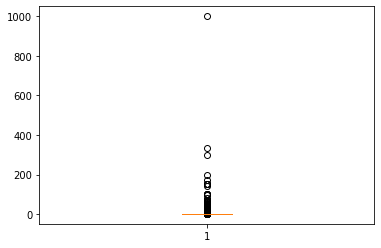

In [13]:
B = plt.boxplot(df['quantity'])
[item.get_ydata() for item in B['whiskers']]

Ящик с усами превратился в линию, поскольку значения первого и третьего квартиля совпадают. Т.е. 75% всех товаров куплено в количестве 1 штука за раз. Тем не менее мы видим довольно много точек за пределами "ящика". Посмотрим на него в другом масштабе:

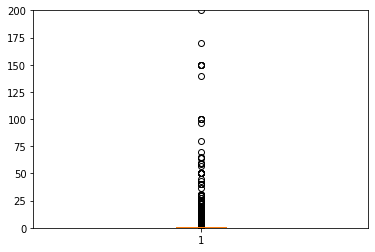

In [14]:
B = plt.boxplot(df['quantity'])
[item.get_ydata() for item in B['whiskers']]
plt.ylim(0, 200)
plt.show()

Примерно до отметки 75 товаров точки лежат довольно плотно. В целом клиентов, покупающих более 10 товаров можно отнести в отдельную категории "оптовики", делать для них спец предложения по цене и другие акции. Посмотрим, сколько данных в нашем датафрейме с quantity > 10:

In [15]:
round(100*len(df[df['quantity'] > 10])/len(df), 2)

2.64

Менее трёх процентов строк в датасете относятся к оптовикам. Изучение поведения оптовиков можно выделить в отдельную задачу. В текущем исследовании будем ориентироваться на поведение розничных покупателей, т.е. уберём эти строки из дальнейшего рассмотрения:

[array([1., 1.]), array([1., 1.])]

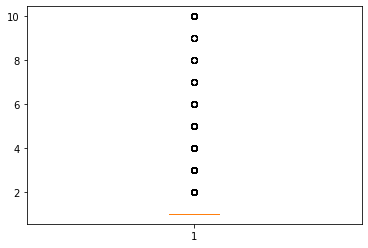

In [16]:
df = df[df['quantity'] <= 10]
B = plt.boxplot(df['quantity'])
[item.get_ydata() for item in B['whiskers']]

Усы ящика не сдвинулись, но мы можем оставить разброс значений в таком диапазоне. Посмотрим теперь на стоимость товаров: цена одного товара лежит в диапазоне от 9 до 14917 рублей, 75% товаров стоят менее 400 рублей. Т.е. в целом в магазине продаются в основном дешёвые товары. Посмотрим также на ящик с усами:

[array([106.,   9.]), array([415.5, 869. ])]

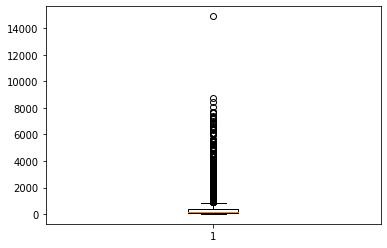

In [17]:
B = plt.boxplot(df['price'])
[item.get_ydata() for item in B['whiskers']]

Большая часть цен находится в диапазоне от 106 до 415.5 рублей. При этом есть товары, которые на порядок дороже основных. Нижний ус упирается в минимальную цену товара, а верхний находится на отметке 869 рублей. Как вариант эти товары можно выделить в отдельную категорию, а дальше сегментировать товарные группы внутри "дешёвых" и "дорогих" товаров. Т.е. сделать сегментацию товаров многоуровневой. Это следующий шаг исследования, в текущем будем изучать и сегментировать товары всех цен вместе.

In [20]:
df.customer_id.nunique()

2338

Проверим, не встречается ли один и тот же заказ в разные даты:

In [21]:
df.groupby(['customer_id', 'order_id', 'product']).count().sort_values('quantity', ascending = False).head(15)

date  \
customer_id                          order_id product                                                                      
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    Рассада Огурец Фараон ячейки по 6 шт Е6                                 74   
                                              Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт    74   
                                              Рассада Патиссона сорт Диск, кассета по 6шт                             74   
                                              Рассада Огурца сорт Каролина кассета 6 шт E6                            74   
                                              Рассада Огурец Кристина ячейки по 6 шт Е6                               74   
                                              Рассада Кабачка сорт Сосновский, кассета по 6шт                         74   
                                              Рассада Кабачка сорт Золотинка кассета 6 шт E6                          74   
                                              Рассада Кабачка сорт Зебра кассета 6 шт E6                              74   
                                              Рассада Кабачка сорт Горный, кассета по 6шт                             74   
                                              Рассада Кабачка сорт Белогор кассета 6 шт E6                            74   
                                              Рассада Кабачка сорт Аэронавт, кассета по 6шт                           74   
                                              Рассада Патиссона сорт НЛО Белый, кассета по 6шт                        74   
57cc80a2-2610-4eef-9457-e7c3bf0c72f0 70960    Сумка-тележка 2-х колесная Gimi Argo красная                            60   
8c290149-ad54-4d7a-87a7-9386b36390ee 69162    Термометр на окно уличный на липучках Т-5 h-20 см 1210035               23   
ae6940d3-a1c7-4997-8853-a5b8afc60d51 71148    Гладильная доска НИКА Гранд 122х42 см НГ                                16   

                                                                                                                    quantity  \
customer_id                          order_id product                                                                          
1d6c8c1f-a799-4418-9af2-1ded47d7a85c 14833    Рассада Огурец Фараон ячейки по 6 шт Е6                                     74   
                                              Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт        74   
                                              Рассада Патиссона сорт Диск, кассета по 6шт                                 74   
                                              Рассада Огурца сорт Каролина кассета 6 шт E6                                74   
                                              Рассада Огурец Кристина ячейки по 6 шт Е6                                   74   
                                              Рассада Кабачка сорт Сосновский, кассета по 6шт                             74   
                                              Рассада Кабачка сорт Золотинка кассета 6 шт E6                              74   
                                              Рассада Кабачка сорт Зебра кассета 6 шт E6                                  74   
                                              Рассада Кабачка сорт Горный, кассета по 6шт                                 74   
                                              Рассада Кабачка сорт Белогор кассета 6 шт E6                                74   
                                              Рассада Кабачка сорт Аэронавт, кассета по 6шт                               74   
                                              Рассада Патиссона сорт НЛО Белый, кассета по 6шт                            74   
57cc80a2-2610-4eef-9457-e7c3bf0c72f0 70960    Сумка-тележка 2-х колесная Gimi Argo красная                                60   
8c290149-ad54-4d7a-87a7-9386b36390ee 69162    Термометр на окно уличный на липучках Т-5

Да, один и тот же заказ фигурирует за разные даты, это может сильно искажать реальную картину. Нужно оставить в датасете только уникальные пары дата-номер заказа:

In [22]:
order_first_date = df.groupby('order_id')['date'].min() 
order_first_date.name = 'order_first_date'
order_first_date

order_id
12624   2019-06-02 20:00:00
13547   2018-10-05 00:00:00
14480   2018-10-02 11:00:00
14481   2018-10-02 17:00:00
14482   2018-10-07 12:00:00
                ...        
73155   2019-10-31 11:00:00
73156   2019-10-31 11:00:00
73158   2019-10-31 12:00:00
73162   2019-10-31 13:00:00
73164   2019-10-31 14:00:00
Name: order_first_date, Length: 2651, dtype: datetime64[ns]

In [23]:
df = df.merge(order_first_date, how='right', on=['order_id'])
len(df)

6559

In [24]:
df.drop_duplicates(subset=['customer_id', 'order_id', 'product'], inplace=True)
df = df.reset_index(drop=True)
len(df)

4700

Датасет очищен, таким образом примерно 28% данных были дубликатами. Посмотрим, сколько уникальных товаров и пользователей осталось:

In [25]:
print(f"Всего в датасете фигурирует {df['product'].nunique()} уникальных товара."
      f" В датасете {df.customer_id.nunique()} уникальный пользователь."
      f" Они совершили суммарно {df.order_id.nunique()} заказа."
      f" Таким образом на каждого пользователя приходится в среднем "
      f"{round(df.order_id.nunique()/df.customer_id.nunique(),2)} заказов.")


Всего в датасете фигурирует 2276 уникальных товара. В датасете 2338 уникальный пользователь. Они совершили суммарно 2651 заказа. Таким образом на каждого пользователя приходится в среднем 1.13 заказов.


После того, как датасет очищен, можно посмотреть на поведение пользователей. Для начала посмотрим, меняется ли выручка магазина в зависимости от сезона. Выделим день в отдельную колонку (будем агрегировать выручку магазина за день), затем постром зависимость дневной выручки магазина от времени:

In [26]:
df['day'] = df['date'].astype('datetime64[D]')
df['income'] = df['price'] * df['quantity'] # столбец с выручкой от продажи продуктов одного наименования
dau_total = df.groupby('day').agg({'customer_id': 'nunique'}).mean()
daily_n_orders = df.groupby('day').agg({'order_id': 'nunique'}).mean()
daily_income_mean = df.groupby('day').agg({'income': 'sum'}).mean()
print(f'В среднем в день в магазине {round(dau_total[0],2)} уникальных покупателей.'
      f' Они совершают в среднем {round(daily_n_orders[0],2)} покупок.'
      f' Средняя выручка магазина за день составляет {round(daily_income_mean[0])} рублей.')

В среднем в день в магазине 6.49 уникальных покупателей. Они совершают в среднем 6.87 покупок. Средняя выручка магазина за день составляет 7507.0 рублей.


Посмотрим теперь, как дневная выручка магазина меняется по времени. Таким образом мы сделаем первую поппытку для выявления сезонности (первую, поскольку одни товары могут продаваться лучше в один сезон, вторые - в другой, а в сумме выручка примерно оставаться на том же уровне):

In [27]:
purchases_per_user = (df.groupby(['day'])
                      .agg({'customer_id': ['nunique'], 'income': ['sum']})
                     )
purchases_per_user.columns = ['nunique_users', 'daily_income']
purchases_per_user.reset_index(inplace = True)
purchases_per_user['income_per_user'] = round(purchases_per_user['daily_income'] 
                                              / purchases_per_user['nunique_users'], 2
                                             )
purchases_per_user

,day,nunique_users,daily_income,income_per_user
0,2018-10-01,10,10286.0,1028.60
1,2018-10-02,11,13399.0,1218.09
2,2018-10-03,6,7275.0,1212.50
3,2018-10-04,10,24330.0,2433.00
4,2018-10-05,7,4720.0,674.29
...,...,...,...,...
386,2019-10-27,3,626.0,208.67
387,2019-10-28,5,2140.0,428.00
388,2019-10-29,2,642.0,321.00
389,2019-10-30,11,7809.0,709.91


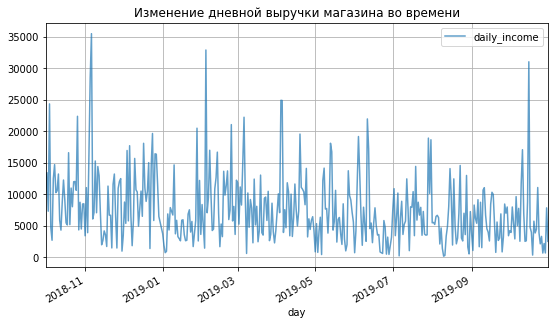

In [28]:
purchases_per_user.plot(x='day', y='daily_income', kind='line', alpha=0.7, grid=True, figsize=(9,5), title= 'Изменение дневной выручки магазина во времени')
plt.show()


График очень шумный. Выручка за день - не самый удобный масштаб для отслеживания тренда, добавим колонку с неделей, посмотрим, как меняется еженедельная выручка магазина:

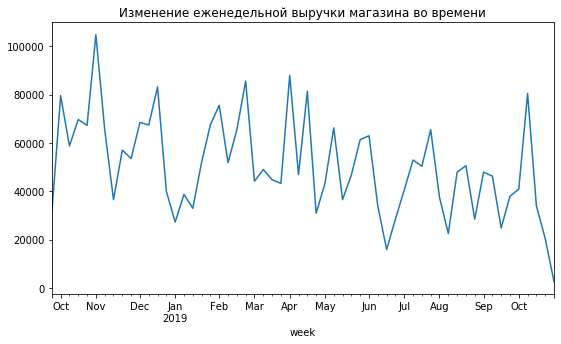

In [29]:
purchases_per_user['week'] = purchases_per_user['day'].astype('datetime64[W]')
purchases_per_user['month'] = purchases_per_user['day'].astype('datetime64[M]')
purchases_per_user.groupby('week').agg({'daily_income': 'sum'}).plot(grid=False, figsize=(9,5), title= 'Изменение еженедельной выручки магазина во времени', legend=False)
plt.show()

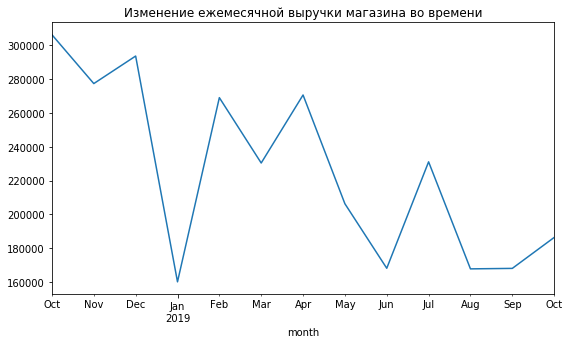

In [30]:
purchases_per_user.groupby('month').agg({'daily_income': 'sum'}).plot(grid=False, figsize=(9,5), title= 'Изменение ежемесячной выручки магазина во времени', legend=False)
#plt.savefig("Изменение ежемесячной выручки магазина во времени.png", dpi=300)
plt.show()

По последнему графику отчётливо видно, что ежемесячная выручка интернет-магазина падает. Самая низкая выручка была за январь, июнь, август и сентябрь. Т.е. более прибыльними оказались месяцы с основными праздниками (НГ, 23 февраля, 8 марта) и месяц основных садово-дачных работ - апрель. При этом октябрь 2018 и октябрь 2019 года сильно отличаются по выручке. Возможно в 2018 году магазин только открылся и проводились какие-то акции в связи с этим.

Посмотрим, как меняется во времени удельный доход, т.е. средняя выручка от одного пользователя:

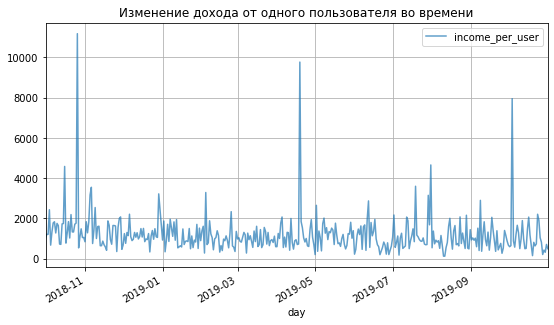

In [31]:
purchases_per_user.plot(x='day', y='income_per_user', kind='line', alpha=0.7, grid=True, figsize=(9,5), title= 'Изменение дохода от одного пользователя во времени')
plt.show()

Опять же по такому масштабу тренд не совсем понятен, посмотрим значения за неделю:

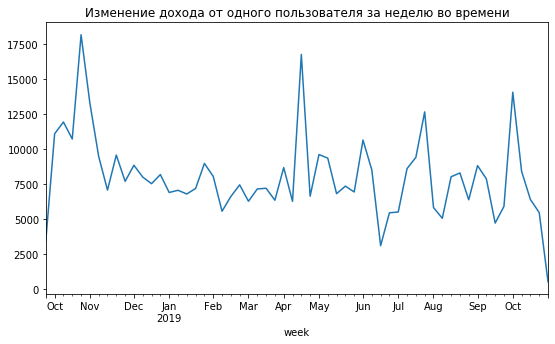

In [32]:

purchases_per_user['week'] = purchases_per_user['day'].astype('datetime64[W]')
purchases_per_user.groupby('week').agg({'income_per_user': 'sum'}).plot(grid=False, figsize=(9,5), title= 'Изменение дохода от одного пользователя за неделю во времени', legend=False)
#plt.savefig("Изменение дохода от одного пользователя за неделю во времени.png", dpi=300)
plt.show()

Видим тот же тренд, что и в выручке: тренд демонстрирует отдельные пики, но сделать одназначный вывод о сезонном изменении выручки нельзя.

Изучим также количество покупок, совершённых клиентами магазина за неделю, посмотрим, как оно меняется во времени:

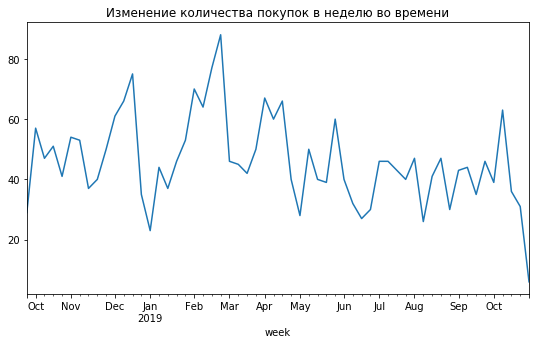

In [33]:
df['week'] = df['day'].astype('datetime64[W]')
df.groupby('week').agg({'order_id': 'nunique'}).plot(grid=False, figsize=(9,5), title= 'Изменение количества покупок в неделю во времени', legend=False)

#plt.savefig("Изменение количества покупок в неделю во времени.png", dpi=300)
plt.show()

Больше всего покупок совершается в декабре и феврале (конец февраля), что не сильно отражается на выручке магазина. Это месяцы с основными праздниками: НГ, 23 февраля, 8 марта, соответственно рост числа покупок может быть связан с покупкой подарков. В связи с этим можно рекомендовать магазину **ввести в ассортимент более дорогие варианты подарков**, чтобы повысить выручку в эти месяцы. С середины марта по середину апреля также наблюдается пик, который может быть обусловлен подготовкой к дачному сезону.

Посмотрим, теперь, как распределено число покупок одного пользователя:

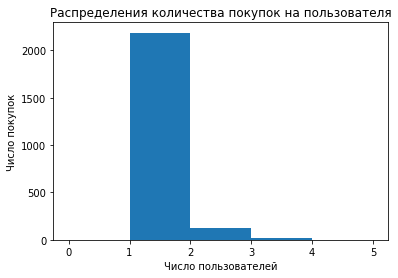

In [34]:
ax = plt.gca()
df.groupby(['customer_id']).agg({'order_id': 'nunique'}).hist(ax=ax, grid=False, bins=5, range=(0, 5))
ax.set_title("Распределения количества покупок на пользователя")
ax.set_xlabel("Число пользователей")
ax.set_ylabel("Число покупок")
#plt.savefig("Распределения количества покупок на пользователя.png", dpi=300)
plt.show()

Преимущественно клиенты совершали покупки в хозяйственном магазине единожды.

В заключении исследовательского анализа посмотрим на распределение размера корзины (сколько единиц товара в одном чеке):

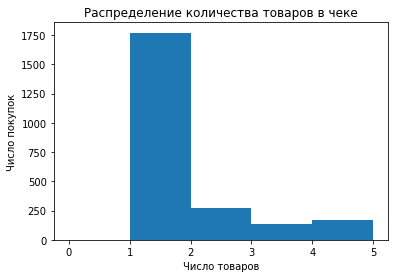

In [35]:
ax = plt.gca()
df.groupby(['order_id']).agg({'quantity': 'sum'}).hist(ax=ax, grid=False, bins=5, range=(0, 5))
ax.set_title("Распределение количества товаров в чеке")
ax.set_xlabel("Число товаров")
ax.set_ylabel("Число покупок")
plt.show()

In [36]:
df.groupby(['order_id']).agg({'quantity': 'sum'})['quantity'].value_counts()[:5]

1     1771
2      275
3      131
4      100
10      71
Name: quantity, dtype: int64

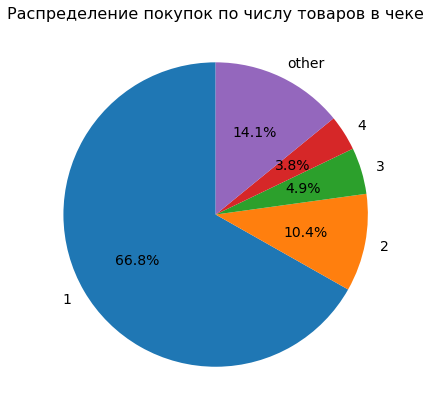

In [37]:
fig = plt.figure(figsize=(7,7))
pie_data = df.groupby(['order_id']).agg({'quantity': 'sum'})['quantity'].value_counts()
combined = sum(pie_data[4:])
first = pie_data[:4]
x = [str(x) for x in list(first.index)]+["other"]
y = list(first)+[combined]
plt.pie(y, labels=x,
        autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title("Распределение покупок по числу товаров в чеке", fontsize=16)
#plt.savefig("Распределение покупок по числу товаров в чеке.png", dpi=300)
plt.show()

В шестидесяти семи процентах покупок, клиент приобрёл только один товар. Два товара приобретено примерно в десяти процентах покупок.

## Шаг 2. Выводы  <a id="step8"></a> 

Для анализа поведения пользователей датасет был очищен от выбросов: были убраны данные, где один и тот же товар куплен больше 10 раз за одну покупку (это покупатели-оптовики, поведение которых нужно изучать в отдельном исследовании). При этом мы потеряли примерно 3% данных. Были обнаружены ошибки в записи данных: один и тот же заказ от одного и того же юзера (с тем же набором товаров) может фигурировать в датасете несколько раз. Скорее всего это связано с какими-то этапами обработки заказа. Если не удалить эти данные, то один и тот же заказ повысит выручку магазина и создаст другие искажения. Во избежание негативных последствий, такие данные были удалены, что привело к сокращению размера датасета примерно на 30%.

При анализе поведения покупателей выявлено следующее:
- в среднем в день в магазине 6.49 уникальных покупателей;
- они совершают в среднем 6.87 покупок;
- средняя выручка магазина за день составляет 7507 рублей.

Было изучено изменение выручки магазина во времени. В январе, июне и августе наблюдается серьёзное падение выручки.

Для изучения частотности совершения покупок в хозяйственном магазине была построена гистограмма распределения числа покупок уникального пользователя. Абсолютное большинство покупателей совершили только одну покупку за исследуемый отрезок времени, также у 67% покупателей был только один товар в чеке. Эти факты накладывают ряд весомых ограничений на сегментацию покупателей, поскольку нет данных для анализа поведенческих особенностей при совершении покупки. Например, нельзя сказать, что пользователь всегда совершает покупки по выходным, если это произошло единожды. Аналогично нельзя проводить сегментацию по стоимости заказа, поскольку и эта величина может быть случайной. Представляется наиболее логичным опираться на то, что покупали пользователи. Т.е. фактически нам нужно создать товарные категории. Это и есть задача следующего шага.

## Шаг 3. Сегментация покупателей по профилю потребления  <a id="step9"></a> 

В предыдущем пункте мы пришли к выводу, что с имеющимися данными наиболее логично ориентироваться не на поведенческие характеристики пользователей, а на их покупки. Посмотрим, что покупают наиболее часто в хозяйственном магазине:

In [38]:
df['product'].value_counts().head(10)

Пеларгония розебудная Red Pandora укорененный черенок                 66
Пеларгония розебудная Prins Nikolai укорененный черенок               57
Пеларгония зональная диам. 12 см сиреневый полумахровый               52
Сумка-тележка 2-х колесная Gimi Argo синяя                            47
Пеларгония розебудная Mary укорененный черенок                        39
Пеларгония розебудная Queen Ingrid укорененный черенок                30
Пеларгония розебудная Margaretha укорененный черенок                  29
Пеларгония зональная диам. 12 см коралловая полумахровая              24
Пеларгония зональная махровая лососевая                               24
Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок    24
Name: product, dtype: int64

Видим, что наиболее часто покупают рассаду и различные растения, также часто встречаются сумки-тележки. Попробуем выделить сначала следующие товарные категории: рассада, растения, сумки-тележки. Посмотрим, сколько товаров останутся не рассортироваными (отправим их в категорию "другое"):

In [39]:
m = Mystem()
def lemmas_clean(text):
    """
    Функция берёт текст, лемматизирует слова в нём, если встречаются определённые слова, 
    функция возвращает название категории.
    
    """
    lemmas = m.lemmatize(text)
    if 'рассада' in lemmas:
        return 'дача'
    elif len([plant for plant in plants if plant in lemmas]) > 0:
        return 'растения'
    elif len([bag for bag in bags if bag in lemmas]) > 0:
        return 'сумки и тележки'
    elif len([household_need for household_need in household_needs if household_need in lemmas]) > 0:
        return 'бытовые нужды'
    else:
        return 'другое'


In [40]:
bags = ['сумка', 'тележка']
plants = ['петуния', 'растение', 'пеларгония', 'калибрахоа', 'герань']
household_needs = ['доска', 'сушилка', 'термометр']
df['product_category'] = df['product'].apply(lemmas_clean)
df['product_category'].value_counts()

другое             2204
растения           1047
дача                596
бытовые нужды       503
сумки и тележки     350
Name: product_category, dtype: int64

Пока категория "другое" слишком большая. Посмотрим, какие товары в ней наиболее популярны:

In [41]:
df[df['product_category'] == 'другое']['product'].value_counts().head(10)

Муляж Баклажан 18 см                                                     10
Циперус Зумула d-12 см h-25 см                                           10
Мята перечная Шоколадная Chocolate d-7 см h-10 см укорененный черенок     9
Муляж Зеленое яблоко полиуретан d-6 см                                    8
Муляж Персики мини полиуретан d-6 см                                      8
Новогоднее дерево Ель сербская d-21 см h-60 см                            8
Подкладка под чехол Zalger 520114 135х50 см войлок                        7
Сиденье в ванну раздвижное, белый, СВ5, НИКА                              7
Бакопа ампельная махровая сиреневая махровая объем 0,5 л                  7
Бакопа ампельная мега-крупная белая объем 0,5 л                           7
Name: product, dtype: int64

Нужно рассширить словарь с растениями (добавить бакопу, эвкалипт, лобелию, вербену и вербейник) и бытовые нужды (добавить корыто, карниз и сиденье). Скорее всего затем нужно будет добавить категорию "декор" с мулляжами.

In [42]:
plants = ['петуния', 'растение', 'пеларгония', 'калибрахоа', 'герань', 'бакопа', 'эвкалипт', 'лобелия', 'вербейник', 'вербена']
household_needs = ['доска', 'сушилка', 'термометр', 'корыто', 'карниз', 'сиденье']
df['product_category'] = df['product'].apply(lemmas_clean)
df['product_category'].value_counts()

другое             2143
растения           1088
дача                596
бытовые нужды       523
сумки и тележки     350
Name: product_category, dtype: int64

Значительно лучше не стало. Попробуем другой подход: выделим в отдельный датафрейм уникальные названия товаров и их категории. Посмотрим, сколько уникальных товаров осталось без категории:

In [43]:
product_category = df.groupby(['product']).agg({'product_category': 'unique'}).reset_index()
len(product_category[product_category['product_category'] == 'другое'])

1508

Значит, 1468 товаров остались без категоризации. Попробуем сначала лемматизировать названия товаров, а затем взять слова, которые встречаются наиболее часто, это поможет выделить ещё какие-то категории, или расширить имеющиеся:

In [44]:
def lemmas_generation(text):
    """
    Функция берёт текст, возвращает лемматизированные слова из текста.
    
    """
    lemmas = m.lemmatize(text)
    return lemmas

In [45]:
product_category['lemmas'] = product_category['product'].apply(lemmas_generation)

In [46]:
a = (functools
     .reduce(operator.iconcat, product_category[product_category['product_category'] == 'другое']['lemmas']
     .to_list(), [])
    )
product_lemmas_other = [item for item in a if len(item) > 2]
Counter(product_lemmas_other).most_common()

[('для', 282),
 ('белый', 122),
 ('красный', 89),
 ('сорт', 85),
 ('томат', 79),
 ('горшок', 74),
 ('Luminarc', 73),
 ('коврик', 72),
 ('помидор', 72),
 ('среднеспелый', 69),
 ('муляж', 68),
 ('ванный', 65),
 ('роза', 63),
 ('цветок', 61),
 ('пластмассовый', 56),
 ('объем', 54),
 ('штора', 53),
 ('искусственный', 51),
 ('розовый', 49),
 ('штука', 49),
 ('пластиковый', 48),
 ('100', 47),
 ('ручка', 46),
 ('комната', 46),
 ('индетерминантный', 46),
 ('черный', 45),
 ('набор', 42),
 ('полиуретан', 41),
 ('желтый', 40),
 ('крышка', 40),
 ('Attribute', 40),
 ('оранжевый', 40),
 ('вешалка', 40),
 ('кассета', 39),
 ('придверный', 39),
 ('раннеспелый', 37),
 ('садовый', 36),
 ('стремянка', 36),
 ('сталь', 34),
 ('цвет', 34),
 ('таз', 34),
 ('алюминиевый', 33),
 ('зеленый', 31),
 ('бежевый', 30),
 ('Wellness', 30),
 ('хлопок', 30),
 ('пвх', 30),
 ('синий', 29),
 ('скатерть', 29),
 ('детерминантный', 29),
 ('белье', 28),
 ('тарелка', 27),
 ('голубой', 24),
 ('покрытие', 24),
 ('полиэстер', 24),


После такой сортировки лемм в категории "другое" можно расширить словари. Нам нужно добавить ещё леммы во все категории, поэтому перепишем функцию:

In [47]:
def lemmateizer(text):
    """
    Функция берёт текст, лемматизирует слова в нём, если встречаются определённые слова, 
    функция возвращает название категории.
    
    """
    lemmas = m.lemmatize(text)
    if len([decoration for decoration in decorations if decoration in lemmas]) > 0:
        return 'декор'
    elif len([household_need for household_need in household_needs if household_need in lemmas]) > 0:
        return 'бытовые нужды'
    elif len([garden_item for garden_item in garden if garden_item in lemmas]) > 0:
        return 'дача'
    elif len([plant for plant in plants if plant in lemmas]) > 0:
        return 'растения'
    else:
        return 'другое'


In [48]:
decorations = (['муляж', 'коврик', 'штора', 'скатерть', 'текстильный', 'Luminarc', 
                'букет', 'корзина', 'салатник', 'чехол', 'полотенце', 'одежда', 'десертный', 'полка',
               'ковер', 'плечики', 'хлопковый', 'рисунок', 'посуда', 'ложка', 'стакан', 'кашпо', 'подарочный'
               'кастрюля', 'композиция', 'столовая', 'суповой', 'салфетка', 'обеденный', 'сковорода',
               'кружка', 'стеклянный', 'белье', 'тарелка', 'придверный', 'блюдо', 'искуственный', 'новогодний'])
garden = ['рассада', 'сорт', 'садовый', 'среднеспелый', 'раннеспелый', 'базилик']
plants = (['петуния', 'растение', 'пеларгония', 'калибрахоа', 'герань', 'бакоп', 'эвкалипт', 
           'лобелия', 'вербейник', 'вербена', 'горшок', 'роза', 'примула', 'фиалка', 'укорененный'])
household_needs = (['доска', 'сушилка', 'термометр', 'корыто', 'карниз', 'сиденье', 
                    'таз', 'вешалка', 'крышка', 'стремянка', 'банка', 'швабра', 'ручка', 'сумка', 'тележка',
                   'нержавеющий', 'пищевой', 'нержавеющий', 'ерш', 'подставка', 'лестница', 'хранение', 
                   'мыло', 'коробка', 'зубной', 'хозяйственный', 'мусор', 'контейнер', 'пищевой', 'алюминиевый',
                   'металлический', 'нержавеющий', 'пвх', 'пластиковый'])
df['product_category'] = df['product'].apply(lemmateizer)
df['product_category'].value_counts()

растения         1195
декор            1103
бытовые нужды     890
дача              850
другое            662
Name: product_category, dtype: int64

Мы разделили товары в хозяйственном магазине на пять категорий, одна из которых "другое". Данная категория самая маленькая по размеру. Поэтому в рамках отведённого на выполнение проекта времени будем считать категоризацию товаров хозяйственного магазина успешной. Поскольку при сегментации покупателей мы опираемся только на содержимое корзины, то фактически мы уже произвели сегментацию пользователей. Те, кто покупает растения - садоводы, кто покупает товары для сада - садоводы, покупатели декора - создатели уюта, ещё есть "покупатели бытовых товаров" и последняя категория "другое". Далее встаёт вопрос к заказчику исследования и проектировщикам рекомендательной системы: либо мы относим покупателя к одной из категорий по его истории покупок (основываемся на том, товаров какой категории он купил больше и рекомендуем ему товары из этой категории), либо мы смотрим, товаров какой категории больше в его корзине сейчас (рекомендация даётся в процессе покупки) и предлагаем товары именно из этой категории. Оба подхода могут быть применены: наприме, для e-mail рассылки мы используем историю покупок, а в процессе покупки мы анализируем состав корзины в моменте. 

Для дальнейшего анализа поведения пользователей из отдельных групп будем сегментировать пользователей, основываясь на истории их покупок. Т.е. подсчитаем для каждого пользователя, товаров из какой категории он купил больше, такую категорию ему и присвоим.

In [49]:
customer_category = df.pivot_table(index=['customer_id', 'product_category'], values='quantity', aggfunc='sum')
customer_category = (customer_category
                     .loc[customer_category.groupby('customer_id',sort=False)['quantity']
                     .idxmax()]
                     .reset_index()
                    )

In [50]:
def user_categorizer(text):
    """
    Функция берёт текст - категорию продукта, в зависимоти от него возвращает категорию пользователя по правилу:
    если продукт - растения, категория покупатель - цветовод,
    если продукт из категории дача, категория покупателя - дачник,
    если продукт - декор, покупатель - создатель уюта, 
    если продукт из категории бытовые нужды, пользователь - покупатель бытовых товаров,
    если продукт из категории "другое", та же категория присваивается покупателю.
    
    """
    lemmas = m.lemmatize(text)
    if text == 'растения':
        return 'цветовод'
    elif text == 'дача':
        return 'дачник'
    elif text == 'декор':
        return 'создатель уюта'
    elif text == 'бытовые нужды':
        return 'покупатель бытовых товаров'
    else:
        return 'другое'


In [51]:
customer_category = customer_category.loc[customer_category.groupby('customer_id',sort=False)['quantity'].idxmax()]

customer_category['customer_category'] = customer_category['product_category'].apply(user_categorizer)
customer_category['customer_category'].value_counts()

создатель уюта                796
покупатель бытовых товаров    727
другое                        370
цветовод                      337
дачник                        108
Name: customer_category, dtype: int64

In [52]:
df = df.merge(customer_category[['customer_id', 'customer_category']], how='right', on=['customer_id'])
df['customer_category'].value_counts()

цветовод                      1139
создатель уюта                1070
покупатель бытовых товаров     998
дачник                         889
другое                         604
Name: customer_category, dtype: int64

Получили интересный результат, что среди уникальных пользователей больше всего создателей уюта и покупателей бытовых товаров, при этом в общем датасете только создатели уюта остаются на той же позиции в рейтинге. На следующем этпае нужно выяснить, покупатели какой категории приносят больше выручки магазину, чтобы подготовить для них более проработанную рекомендательную систему.

В предыдущем шаге было отмечено, что в месяцы садово-дачной активности доходы хозяйственного магазина выше. Можно посмотреть, как изменяется от времени количество покупок для каждой категории. Как и ранее будем смотреть число покупок, сделанных за неделю:

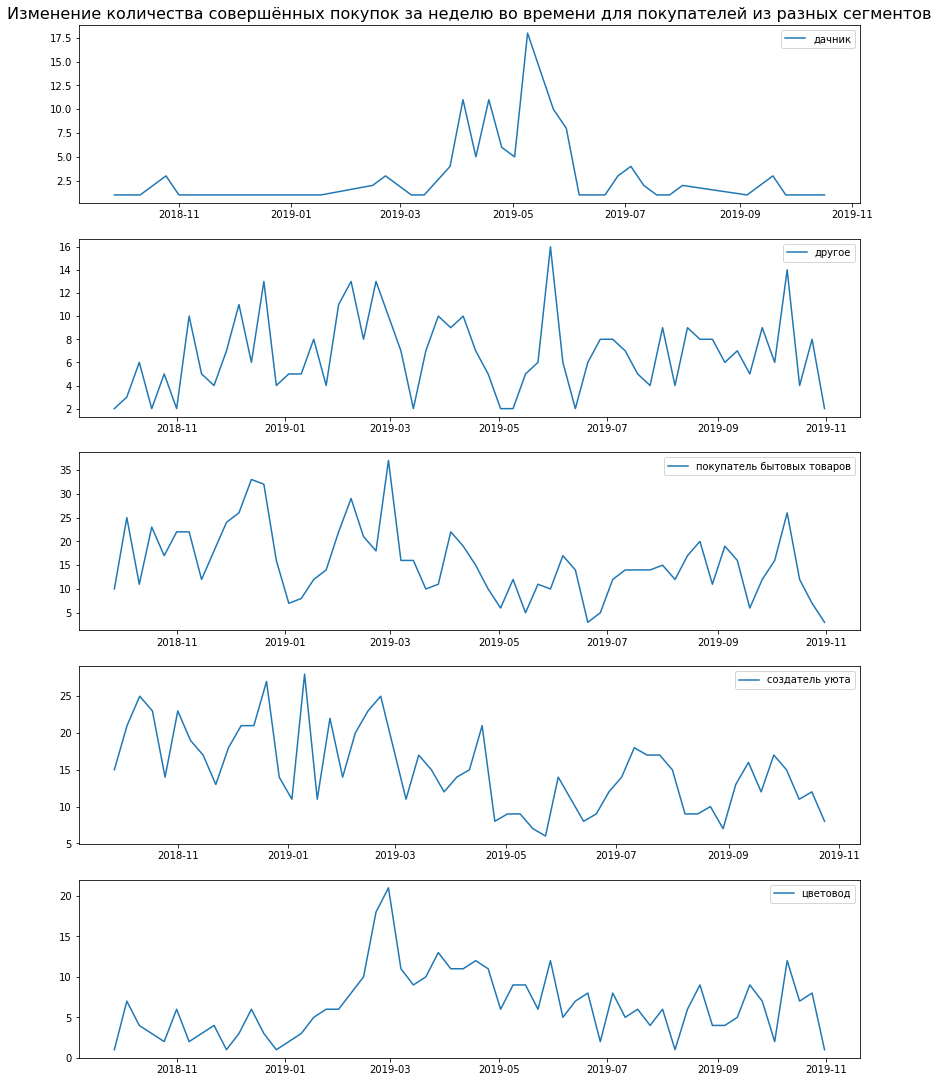

In [53]:
fig, axs = plt.subplots(5,1,figsize=(14,19))#, sharex=True)
axs[0].set_title('Изменение количества совершённых покупок за неделю во времени для покупателей из разных сегментов', fontsize=16)

for i, (column_value, column_slice) in enumerate(df.groupby('customer_category')):
    data = column_slice.groupby('week').agg({'order_id': 'nunique'})
    axs[i].plot(data, label=column_value)
    axs[i].legend()
#plt.savefig("Изменение количества совершённых покупок за неделю во времени для покупателей из разных сегментов.png", dpi=300)
plt.show()

По графикам видно, что категории покупателей "дачник" и "цветовод" имеют выраженную сезонную активность: число покупок цветоводов растёт в конце февраля - начале марта (возможно, это покупка цветов в горшках к 8 марта), а для дачников с апреля по июнь наступает сезон активных покупок.

## Шаг 3. Выводы  <a id="step10"></a> 

С помощью лемматизации мы разделили все товары в хозяйственном магазине на пять товарных категорий: дача, растения (здесь имеются ввиду комнатные растения и цветы), декор (сюда входит также посуда и текстиль), бытовые нужды (разные бытовые принадлежности), в пятую категорию попали все товары, которые не удалось отнести к первым четырём категориям. По числу уникальных пользователей размеры выборок распределены следующим образом:
* создатели уюта – 796 человек,
* покупатели бытовых товаров - 727 человек;
* другое - 370 человека;
* цветоводы - 337 человек;
* дачники - 108 человек. 

Как видим, группы получились не равновеликими, кроме того, интересно, что в общем датасете распределение пользователей выглядит иначе (на первых местах по кол-ву строк в датасете дачники и цветоводы). По временным рядам числа заказов разных сегментов покупателей видим, что пользовательская активность выглядит по-разному. Так, категория покупателей "цветовод" активна в конце февраля, что может быть связано с покупкой цветов в горшках в качестве подарков к 8-му марта, "дачники" же особенно активны в период с апреля по июль, что вполне логично. В следующем шаге предстоит узнать, одинакова ли выручка магазина от пользователей разных групп с помощью статистических тестов. 

## Шаг 4. Проверка статистических гипотез  <a id="step11"></a> 

В данном шаге наша задача - установить для генеральной совокупности всех покупателей хозяйственного магазина, одинакова ли выручка для разных сегментов покупателей, имея данные по выборке из 2197 человек. Возьмём в качестве нулевой гипотезы следующее утверждение: **"выручка магазина от покупателей из разных категорий одинакова".  Альтернативная гипотеза: "выручки от покупателей из разных категорий различаются".** Мы берём утвердительную формулировку для нулевой гипотезы, как это и принято в статистическом анализе. Имея пять категорий пользователей, нам нужно сделать десять попарных статистических тестов. Т.е. в каждом тесте мы формулируем нулевую и альтернативную гипотезы так же, как указано выше, но только для двух сегментов пользователей.  

Прежде чем переходить непосредственно к стат тестам, нужно выяснить, является ли распределение выручки в каждой группе покупателей нормальным. Если да, то мы можем критерий Т-Стьюдента, если нет, то непераметрический критерий Манна Уити:

In [54]:
def is_distribution_normal(data, parametrs, tests):
    """
    Функция берёт в качестве аргумента датасет, столбец, по которому нужно произвести группировку parametrs
    и столбец с измерениями tests. После проведения группировки, функция проверяет, распределены ли измерения нормально.
    Нулевая гипотеза: измерения распределены нормально.
    Альтернативная гипотеза: распределение измерений в столбце отлично от нормального.
    Опровержение гипотезы происходит на основании теста Шапиро-Уилка с уровнем статистической значимости 
    alpha = 0.05.
    """
    alpha = 0.05
    for column_value, column_slice in data.groupby(parametrs):
        print('Проверка на нормальность распределения значений', tests, 'для тарифа', column_value)
        results = shapiro(column_slice[tests])[1]
        print('    p-value =', results)
        if (results < alpha):
            print("    отвергаем нулевую гипотезу, распределение не соответствует нормальному.", end='\n')
        else:
            print("Не получилось отвергнуть нулевую гипотезу о соответствии распределения нормальному.", end='\n')
        print()
        

In [55]:
is_distribution_normal(df, 'customer_category', 'income')

Проверка на нормальность распределения значений income для тарифа дачник
    p-value = 4.311543141003884e-40
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.

Проверка на нормальность распределения значений income для тарифа другое
    p-value = 6.558076813040144e-43
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.

Проверка на нормальность распределения значений income для тарифа покупатель бытовых товаров
    p-value = 2.5978526495077494e-37
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.

Проверка на нормальность распределения значений income для тарифа создатель уюта
    p-value = 4.344025239406933e-44
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.

Проверка на нормальность распределения значений income для тарифа цветовод
    p-value = 0.0
    отвергаем нулевую гипотезу, распределение не соответствует нормальному.



Что и следовало ожидать, распределения выручки от разных групп покупателей не являются нормальными. Значит проверку гипотез нужно осуществлять с помощью непераметрического критерия Манна Уити:

In [56]:
alpha = 0.05 #уровень статистической значимости
user_categories = df['customer_category'].unique().tolist()
user_categories


['другое',
 'создатель уюта',
 'покупатель бытовых товаров',
 'дачник',
 'цветовод']

In [57]:
x = {}
purchases_per_user_cat = {} # словарь с выручкой на одного пользователя для каждой категории
for cat in user_categories:
    x[cat] = df.query(f'customer_category == "{cat}"')['income'] # месячная выручка пользователей из каждой категории
    purchases_per_user_cat[cat] = (df.query(f'customer_category == "{cat}"').groupby(['day'])
                      .agg({'customer_id': ['nunique'], 'income': ['sum']})
                     )
    purchases_per_user_cat[cat].columns = ['nunique_users', 'daily_income']
    purchases_per_user_cat[cat].reset_index(inplace = True)
    purchases_per_user_cat[cat]['income_per_user'] = round(purchases_per_user['daily_income'] 
                                              / purchases_per_user['nunique_users'], 2
                                             )


In [58]:
for i in range(len(user_categories)):
    for j in range(i+1, len(user_categories)):
        cat1 = user_categories[i]
        cat2 = user_categories[j]
        print(f'''Проверка нулевой гипотезы о равенстве выручек покупателей из группы {cat1} и группы {cat2}:
        Нулевая гипотеза – выручки пользователей обеих групп равны.
        Альтернативная гипотеза – выручки пользователей обеих групп отличаются.
        **Результаты проверки:**''')
        mw = mannwhitneyu(x[cat1], x[cat2])
        print('    p-значение: {:.2f}'.format(mw.pvalue))
        if (mw.pvalue < alpha):
            print(f"    Отвергаем нулевую гипотезу: выручки групп пользователей {cat1} и {cat2} отличаются.")
        else:
            print(f"    Не получилось отвергнуть нулевую гипотезу, нет оснований считать выручки двух групп покупателей разными.")
        print('\n')
    

Проверка нулевой гипотезы о равенстве выручек покупателей из группы другое и группы создатель уюта:
        Нулевая гипотеза – выручки пользователей обеих групп равны.
        Альтернативная гипотеза – выручки пользователей обеих групп отличаются.
        **Результаты проверки:**
    p-значение: 0.00
    Отвергаем нулевую гипотезу: выручки групп пользователей другое и создатель уюта отличаются.


Проверка нулевой гипотезы о равенстве выручек покупателей из группы другое и группы покупатель бытовых товаров:
        Нулевая гипотеза – выручки пользователей обеих групп равны.
        Альтернативная гипотеза – выручки пользователей обеих групп отличаются.
        **Результаты проверки:**
    p-значение: 0.00
    Отвергаем нулевую гипотезу: выручки групп пользователей другое и покупатель бытовых товаров отличаются.


Проверка нулевой гипотезы о равенстве выручек покупателей из группы другое и группы дачник:
        Нулевая гипотеза – выручки пользователей обеих групп равны.
        Альтерна

Итак, мы отвергли все нулевые теории, т.е. выручки покупателей из всех пяти групп отличаются. Посмотрим на статистики для групп:

In [59]:
df.groupby('customer_category')['income'].describe()

,count,mean,std,min,25%,50%,75%,max
customer_category,,,,,,,,
дачник,889.0,136.073116,127.921447,9.0,76.00,120.0,150.0,1408.0
другое,604.0,493.798013,1286.199983,9.0,97.00,187.0,406.0,24370.0
покупатель бытовых товаров,998.0,1425.434870,1627.302653,22.0,397.00,899.0,1735.5,16536.0
создатель уюта,1070.0,822.571028,1110.164588,11.0,208.25,524.0,974.0,15680.0
цветовод,1139.0,187.417032,177.966869,15.0,128.00,149.0,188.0,1794.0


Получается, что самая высокая выручка у группы "покупатель бытовых товаров" и "создатели уюта", а самая низкая у "дачников" и "цветоводов". В целом было логично, что выручки групп разной величины (по количеству покупателей) отличаются. Логичнее предположить, что одинаковыми будут не сами выручки, а выручка, поделённая на количество пользователей. Выдвенем нулевую и альтернативную гипотезы:

**нулевая гипотеза: средняя выручка магазина от одного уникального пользователя для каждой категории одинакова. 
Альтернативная гипотеза: среднии выручки магазина от одного уникального пользователя различаются по категориям покупателей**.

In [60]:
for i in range(len(user_categories)):
    for j in range(i+1, len(user_categories)):
        cat1 = user_categories[i]
        cat2 = user_categories[j]
        print(f'''Проверка нулевой гипотезы о равенстве средних выручек на одного покупателя из категории {cat1} и категории {cat2}:
        Нулевая гипотеза – средние выручки на покупателя в обеих категориях равны.
        Альтернативная гипотеза – средние выручки на покупателя для двух категорий отличаются.
        **Результаты проверки:**''')
        mw = mannwhitneyu(purchases_per_user_cat[cat1]['income_per_user'], purchases_per_user_cat[cat2]['income_per_user'])
        print('    p-значение: {:.2f}'.format(mw.pvalue))
        if (mw.pvalue < alpha):
            print(f"    Отвергаем нулевую гипотезу: средние выручки на покупателя для категорий пользователей {cat1} и {cat2} отличаются.")
        else:
            print(f"    Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние выручки на одного пользователя для двух категорий разными.")
        print('\n')
    

Проверка нулевой гипотезы о равенстве средних выручек на одного покупателя из категории другое и категории создатель уюта:
        Нулевая гипотеза – средние выручки на покупателя в обеих категориях равны.
        Альтернативная гипотеза – средние выручки на покупателя для двух категорий отличаются.
        **Результаты проверки:**
    p-значение: 0.16
    Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние выручки на одного пользователя для двух категорий разными.


Проверка нулевой гипотезы о равенстве средних выручек на одного покупателя из категории другое и категории покупатель бытовых товаров:
        Нулевая гипотеза – средние выручки на покупателя в обеих категориях равны.
        Альтернативная гипотеза – средние выручки на покупателя для двух категорий отличаются.
        **Результаты проверки:**
    p-значение: 0.17
    Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние выручки на одного пользователя для двух категорий разными.


Пр

Мы получили, что средние выручки на одного пользователя внутри категорий "цветовод", "покупатель бытовых товаров", "создатель уюта" и "другое" статистически не различимы. От них отличается только удельная выручка покупателя из категории "дачники". Посмотрим, в какую сторону происходит отклонение:

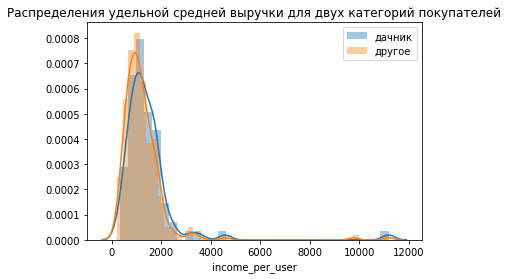

In [61]:
fig = plt.figure()
ax = plt.gca()
sns.distplot(purchases_per_user_cat['дачник']['income_per_user'],
             ax=ax, norm_hist=True, kde=True, label="дачник")
sns.distplot(purchases_per_user_cat['другое']['income_per_user'],
             ax=ax, norm_hist=True, kde=True, label="другое")

ax.legend()
plt.title("Распределения удельной средней выручки для двух категорий покупателей")
#plt.savefig("Распределения удельной средней выручки для двух категорий покупателей.png", dpi=300)
plt.show()

In [62]:
purchases_per_user_cat['дачник']['income_per_user'].describe()

count       84.000000
mean      1462.625119
std       1271.407239
min        336.750000
25%        935.717500
50%       1261.585000
75%       1675.822500
max      11179.500000
Name: income_per_user, dtype: float64

In [63]:
purchases_per_user_cat['цветовод']['income_per_user'].describe()

count      229.000000
mean      1260.677118
std       1058.267601
min        205.750000
25%        754.880000
50%       1067.670000
75%       1500.200000
max      11179.500000
Name: income_per_user, dtype: float64

По статистикам можно сделать вывод о том, что в среднем доход хозяйственного магазина от одного "дачника" выше, чем средние доходы от каждого из представителей других категорий.

## Шаг 4. Выводы  <a id="step12"></a> 

В данном шаге были проверены гипотезы о равенстве выручек от разных групп покупателей. В первую очаредь при проведении статистических тестов необходимо выбрать методику. Поскольку все группы пользователей не прошли тест Шапиро-Уилка с уровнем статистической значимости alpha = 0.05 на соответствие распределения выручки нормальному, то проверка гипотез о равенстве выручек осуществлялась с помощью непераметрического критерия Манна Уитни с уровнем статистической значимости alpha = 0.05. В результате десяти попарных тестов установлено, что все выручки различаются. 

Поскольку группы не одинаковы по количеству покупателей, вывод о разных выручках был ожидаем. Логичнее сравнивать удельные выручки от каждой категории, т.е. сравнивать, какой средний доход принесёт хозяйственому магазину один условный "дачник", "цветовод" и т.д. В результате десяти попарных статистических тестов Манна Уитни с уровнем статистической значимости alpha = 0.05 было установлено, что удельные выручки представителей четырёх категорий статистически равны, а удельная выручка покупателя из категории "дачник" отличается от них. Статистики для удельных выручек покупателей категорий "дачник" и "цветовод" показывают, что один дачник приносит хозяйственному магазину более высокий доход, чем один цветовод, а значит, и чем представители всех остальных групп.

## Общие выводы  <a id="step13"></a> 

Нами был изучен датасет, предоставленный интернет-магазином товаров для дома и быта «Пока все ещё тут». Данные были собраны за период с 01.10.2018 по 31.10.2019, таким образом была возможность проследить сезонность некоторых товаров. Всего в датасете фигурировало 2343 уникальных товара и 2451 уникальных покупателей. После очистки датасета от выбросов, в ходе который было удалено более 30% данных, остался 2276 уникальных товаров и 2338 уникальных покупателей.

В ходе предварительных расчётов установлено, что в среднем в день в магазин приходит примерно 6 покупателей, а средняя дневная выручка магазина составляет 7507 рублей. Временные ряды выручки магазина и средней выручки от одного покупателя не демонстрируют проявленной сезонности. На временном ряду числа покупок есть отчётливые пики, связанные с основными праздниками: НГ, 23 февраля, 8 марта. Т.е. люди совершают в это время больше покупок, но выручка магазина не растёт. Это возможные точки роста: возможно, стоит расширить ассортимент подарков.

С помощью лемматизации товары интернет-магазина были сегментированы на пять категорий: дача (рассада), растения (комнатные растения и цветы), декор (также посуда и текстиль), бытовые нужды (разные бытовые принадлежности), в пятую категорию были выделены товары, которые не удалось отнести к первым четырём. Поскольку покупатели совершали слишком мало повторных покупок, невозможно опираться при сегментации на их поведенческие характеристики. Было принято решение о сегментации покупателей на основе их выбора товаров. Т.е. по тому, к какой категории относится большинство товаров в чеке пользователя мы делаем вывод о том, к какой группе он принадлежит.
Были выделены следующие категории покупателей интернет-магазина: создатели уюта – 796 человек, покупатели бытовых товаров - 727 человек, другое - 370 человек, цветоводы - 337 человек, дачники - 108 человек. Временные ряды количества заказов разных сегментов покупателей демонстрируют разную пользовательскую активность: категория покупателей "цветовод" активна в конце февраля, что может быть связано с покупкой цветов в горшках в качестве подарков к 8-му марта, "дачники" же особенно активны в период с апреля по июль. Другие категории не демонстрируют выраженного сезонного изменения выручки.

Данная сегментация товаров является первичной. Далее можно увеличивать число категорий, чтобы рекомендательная система была более точной. Кроме того во время очистки датасета были обнаружены пользователи, которые покупают за раз большое количество товара одного наименования. Эти пользователи не были изучены в датаесте, но при формировании рекомендательной системы есть смысл выделить таких пользователей в отдельную категорию - оптовики, как вариант, делать для них спец цену на товары и другие спец предложения. Также были обнаружены товары, которые на порядок дороже медианного значения по датасету, эти товары также можно выделить в отделюную группу верхнего уровня, а дальше проводить сегментацию уже по группам условно "дорогих" и "дешёвых" товаров. Т.е. на следующем этапе предлагается  сдедать сегментацию товаров многоуровневой.

С целью сравнения выручек магазина от покупателей по категориям были проведены статистические тесты: для попарного сравнения выручек двух независимых выборок покупателей из разных категорий использовался непераметрический критерий Манна Уитни с уровнем статистической значимости 0.05. Установлено, что выручки от всех групп отличаются, что логично объясняется различием в их численности. При повторном проведении стат тестов для сравнения уже средних выручек от одного покупателя выявлено, что пользователи, принадлежащие к сегменту "дачники", приносят интернет-магазину в среднем более высокий доход. Удельные выручки от пользователей других групп статистически не различаются.